# Lec 1

In [1]:

import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set_theme('notebook', 'whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("data/buenos_aires1.csv", encoding = "cp1252")
data

,type,country,region,lat,lon,price_usd,area_m2,floor,rooms,expenses,property_url
0,apartment,Argentina,Capital Federal,-34.604783,-58.458681,180000.0,110.0,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.649700,-58.658073,410000.0,220.0,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
2,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.595709,-58.566950,180000.0,135.0,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
3,apartment,Argentina,Capital Federal,-34.584651,-58.454693,129000.0,70.0,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
4,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.655209,-58.697320,130000.0,140.0,NaN,NaN,NaN,http://ituzaingo-bs-as-g-b-a-zona-oeste.proper...
...,...,...,...,...,...,...,...,...,...,...,...
4827,apartment,Argentina,Bs.As. G.B.A. Zona Oeste,-34.601062,-58.566101,54000.0,31.0,10.0,2.0,NaN,http://caseros.properati.com.ar/vbya_venta_dep...
4828,apartment,Argentina,Bs.As. G.B.A. Zona Norte,-34.492839,-58.495680,85000.0,27.0,6.0,NaN,NaN,http://martinez.properati.com.ar/11cqc_venta_d...
4829,house,Argentina,Bs.As. G.B.A. Zona Norte,-34.356741,-58.796701,1600000.0,600.0,NaN,NaN,NaN,http://bs-as-g-b-a-zona-norte.properati.com.ar...
4830,house,Argentina,Capital Federal,-34.612354,-58.387462,190000.0,115.0,NaN,NaN,NaN,http://san-nicolas.properati.com.ar/zzpa_venta...


## EDA & Wrangling

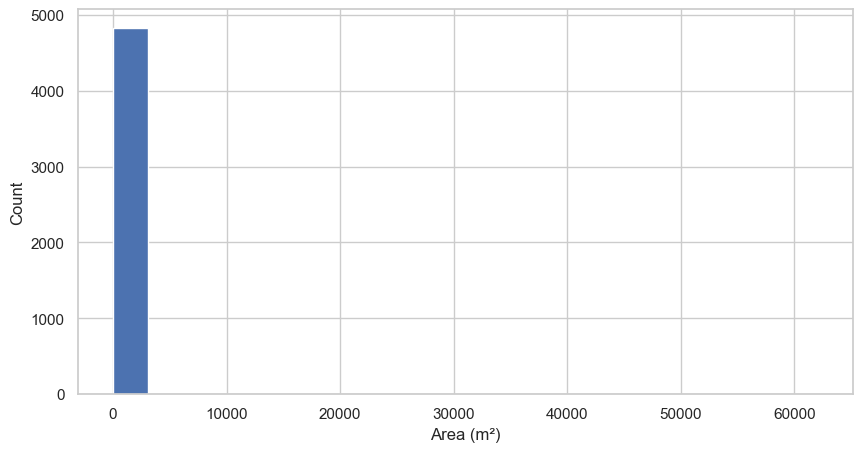

In [3]:
data.area_m2.plot(kind="hist",
                  xlabel="Area (m²)", 
                  ylabel="Count", 
                  bins=20, 
                  figsize=(10, 5));

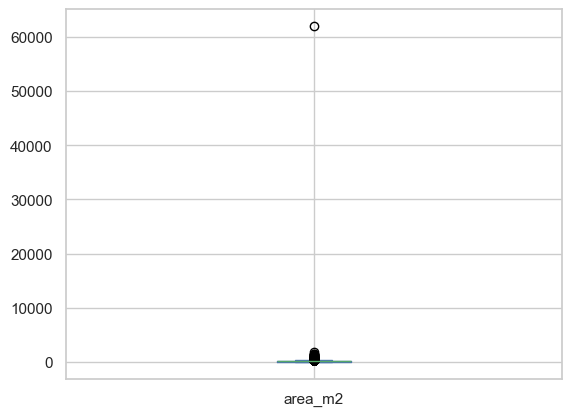

In [4]:
data.area_m2.plot(kind="box");

In [5]:
lo,high =data.area_m2.quantile([0.1,0.9])
data = data[data.area_m2.between(lo,high)]

high = data.price_usd.quantile(0.97)
data = data [data.price_usd.between(0,high)]


data = data[['type', 'country', 'region', 'lat', 'lon', 'area_m2', 'price_usd']]
df = data.reset_index(drop=True)
df.region = df.region.str.replace('Bs.As. G.B.A. ','')

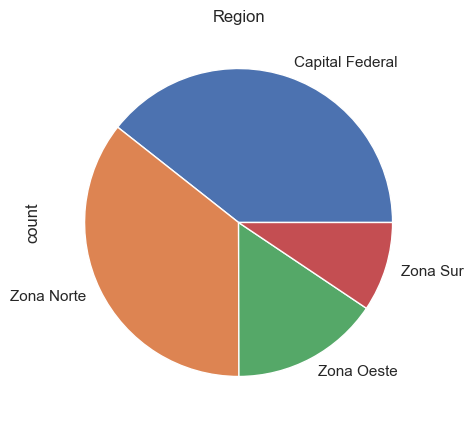

In [6]:
df.region.value_counts().plot(kind="pie",  
               title="Region",
               figsize=(10, 5));

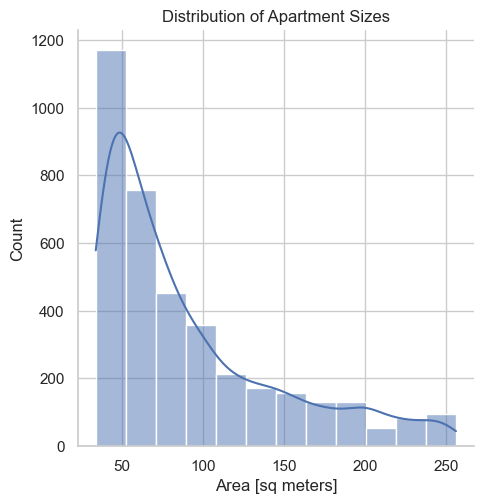

In [7]:
sns.displot(data = df,
           x = 'area_m2',
           kde = True,
           bins = 12)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

<Axes: >

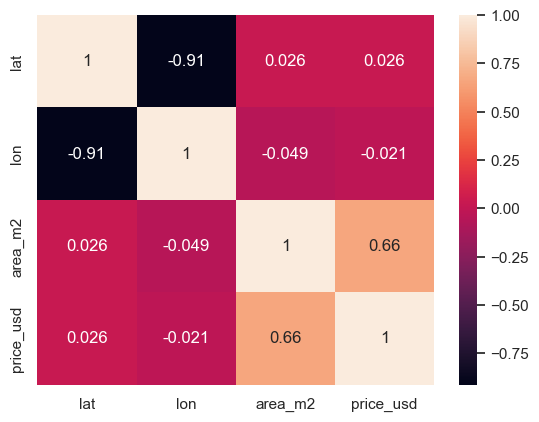

In [8]:
sns.heatmap(df.iloc[:,3:].corr(), annot=True)

## Sampling: Stratified

In [9]:
# Stratified sampling
df.groupby('region').sample(frac=1)

,type,country,region,lat,lon,area_m2,price_usd
491,house,Argentina,Capital Federal,-34.594110,-58.435521,191.0,420000.00
140,apartment,Argentina,Capital Federal,-34.598795,-58.431148,44.0,110000.00
2312,apartment,Argentina,Capital Federal,-34.597014,-58.434128,99.0,184000.00
1827,apartment,Argentina,Capital Federal,-34.616010,-58.411101,38.0,114000.00
2678,apartment,Argentina,Capital Federal,-34.571953,-58.474443,41.0,85000.00
...,...,...,...,...,...,...,...
223,apartment,Argentina,Zona Sur,-34.712179,-58.292856,39.0,54588.74
1655,apartment,Argentina,Zona Sur,-34.924244,-57.950915,80.0,150000.00
3499,house,Argentina,Zona Sur,-34.825192,-58.388817,158.0,100000.00
3706,apartment,Argentina,Zona Sur,-34.951429,-57.979219,59.0,78000.00


In [10]:
# Calculate the number of datapoints to be sampled in each strata
n = df['region'].value_counts().min()

# Sample each strata
sample = df.groupby('region', 
                        group_keys=False).apply(lambda 
                                                x: x.sample(n))

sample = sample.reset_index(drop=True)
sample.index += 1

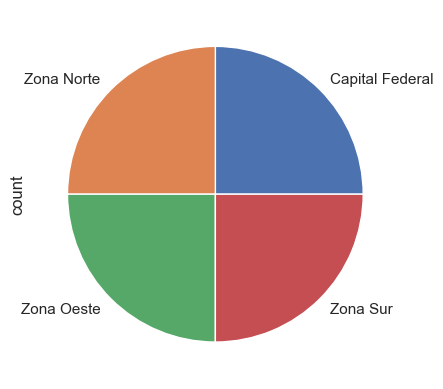

In [11]:
sample.region.value_counts().plot(kind="pie");

In [12]:
sample

,type,country,region,lat,lon,area_m2,price_usd
1,apartment,Argentina,Capital Federal,-34.600246,-58.419107,150.0,180000.0
2,apartment,Argentina,Capital Federal,-34.614193,-58.430228,124.0,300000.0
3,apartment,Argentina,Capital Federal,-34.557484,-58.480670,56.0,165000.0
4,apartment,Argentina,Capital Federal,-34.568103,-58.471523,48.0,110000.0
5,apartment,Argentina,Capital Federal,-34.622513,-58.443995,154.0,290000.0
...,...,...,...,...,...,...,...
1416,apartment,Argentina,Zona Sur,-34.710520,-58.389759,43.0,80000.0
1417,apartment,Argentina,Zona Sur,-34.761201,-58.405316,45.0,105000.0
1418,house,Argentina,Zona Sur,-34.855312,-58.390344,137.0,124999.0
1419,apartment,Argentina,Zona Sur,-34.914229,-57.964060,55.0,83198.5


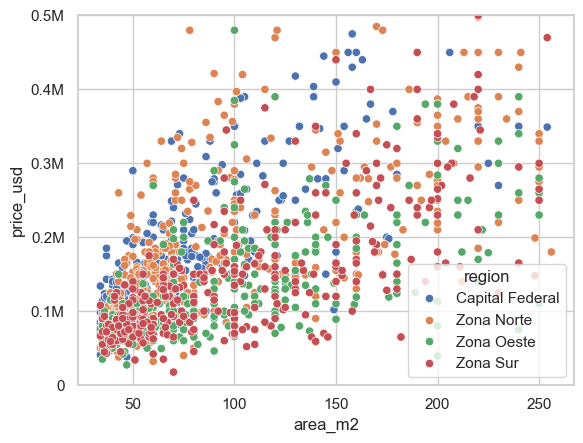

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax);
ax.set_ylim(0,500000);
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

plt.yticks([0,100000,200000,300000,400000,500000]);

## Modelling

### Train - Test Split

In [14]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(sample['area_m2'],
                                             sample['price_usd'],
                                             test_size=0.2,
                                             random_state=69)

In [15]:
xTrain = pd.DataFrame(xTrain).rename({0:'area_m2'},axis=1)
xTest = pd.DataFrame(xTest).rename({0:'area_m2'},axis=1)

### Baseline

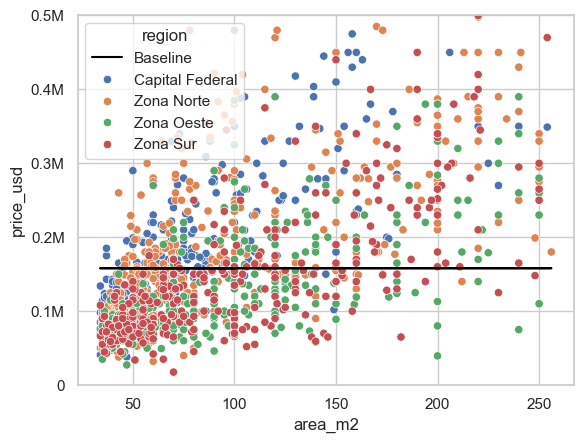

In [16]:
modelBs = np.full_like(yTrain, np.mean(yTrain))


fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

In [17]:
error = mean_absolute_error(yTrain,modelBs)
error2 = mean_absolute_error(yTest,np.full_like(yTest, np.mean(yTrain)))
f'error for training - {round(error,2)} || error for test data - {round(error2,2)}'

'error for training - 72032.84 || error for test data - 68311.2'

### Iteration & Final LR Model

In [18]:
# Initialize the model
model = LinearRegression()

In [19]:
model.fit(xTrain,yTrain)

LinearRegression()

In [20]:
LRerror = mean_absolute_error(yTrain,model.predict(xTrain))
LRerror2 = mean_absolute_error(yTest,model.predict(xTest))
f'error for training - {round(LRerror,2)} || error for test data - {round(LRerror2,2)}'

'error for training - 52427.66 || error for test data - 47432.17'

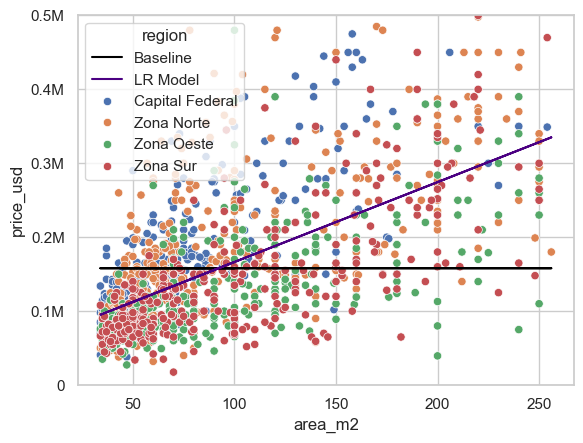

In [21]:
# Visualising the model
fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
plt.plot(xTrain.squeeze(),model.predict(xTrain),color='indigo',label='LR Model')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);